In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
ds = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
ds.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
ds['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [9]:
#Menghapus data duplikat
ds_no_dp = ds.drop_duplicates()
print(ds_no_dp)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [10]:
#identifikasi data hilang
missing = ds.isna().sum()
print (missing)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [12]:
ds[['Systolic','Dystolic']] = ds['Blood Pressure'].str.split('/',expand = True).astype(float)

<h2>Statistika Dasar</h2>

In [13]:
ds.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Dystolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [15]:
numerik = ['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps','Systolic','Dystolic']
objek   = ['Gender','Occupation','BMI Category','Sleep Disorder']
ds[numerik + objek].mode()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Dystolic,Gender,Occupation,BMI Category,Sleep Disorder
0,43,7.2,8,60,3,68,8000,130.0,80.0,Male,Nurse,Normal,Sleep Apnea


<h2>Distribusi Kategorikal</h2>

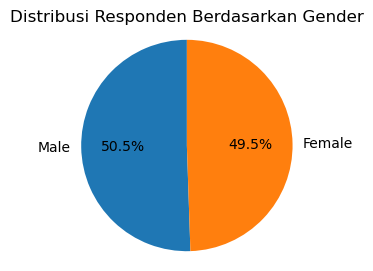

In [20]:
#Distribusi Gender
plt.figure(figsize = (3,3))
plt.pie(ds['Gender'].value_counts(), labels = ds['Gender'].value_counts().index, startangle = 90, autopct='%1.1f%%')
plt.title('Distribusi Responden Berdasarkan Gender')
plt.axis('equal')
plt.show()

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_22188\183849637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x='Occupation', palette = 'pastel')


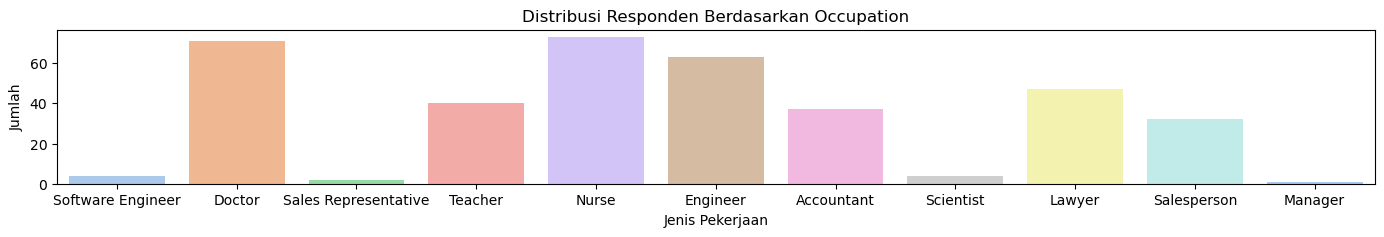

In [24]:
#Distribusi Occopation
plt.figure(figsize=(17,2))
sns.countplot(data=ds, x='Occupation', palette = 'pastel')
plt.title ('Distribusi Responden Berdasarkan Occupation')
plt.xlabel ('Jenis Pekerjaan')
plt.ylabel ('Jumlah')
plt.show()

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_22188\3016336384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x='BMI Category', palette = 'pastel')


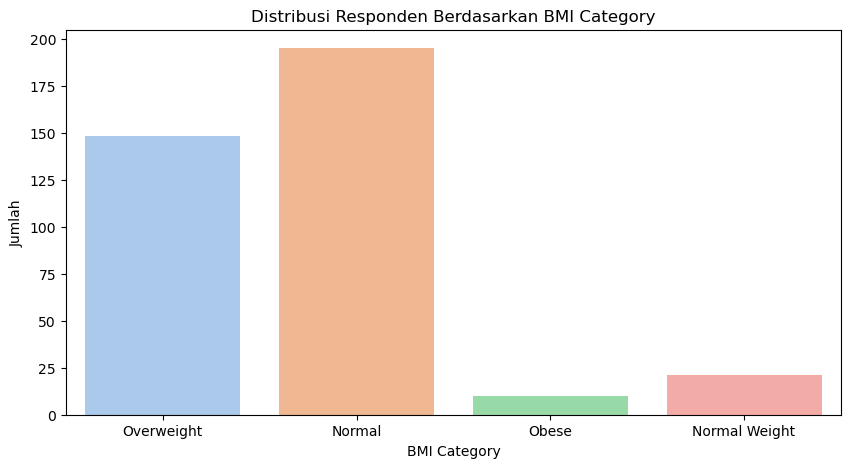

In [29]:
#Distribusi BMI Category
plt.figure(figsize=(10,5))
sns.countplot(data=ds, x='BMI Category', palette = 'pastel')
plt.title ('Distribusi Responden Berdasarkan BMI Category')
plt.xlabel ('BMI Category')
plt.ylabel ('Jumlah')
plt.show()

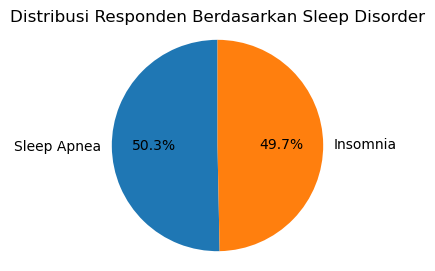

In [31]:
#Distribusi Sleep Disorder
plt.figure(figsize = (3,3))
plt.pie(ds['Sleep Disorder'].value_counts(), labels = ds['Sleep Disorder'].value_counts().index, startangle = 90, autopct='%1.1f%%')
plt.title('Distribusi Responden Berdasarkan Sleep Disorder')
plt.axis('equal')
plt.show()

<h2>Distribusi Kualitas tidur berdasarkan Kategorikal</h2>

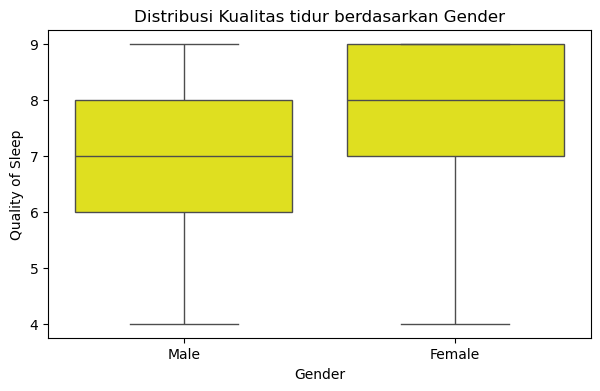

In [36]:
#Distribusi Kualitas tidur berdasarkan Gender
plt.figure(figsize = (7,4))
sns.boxplot(x='Gender', y='Quality of Sleep', data=ds, color='yellow')
plt.title('Distribusi Kualitas tidur berdasarkan Gender')
plt.show()

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_22188\67255806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot (x = 'Occupation', y='Quality of Sleep',data=ds,inner='box',palette='Set2')


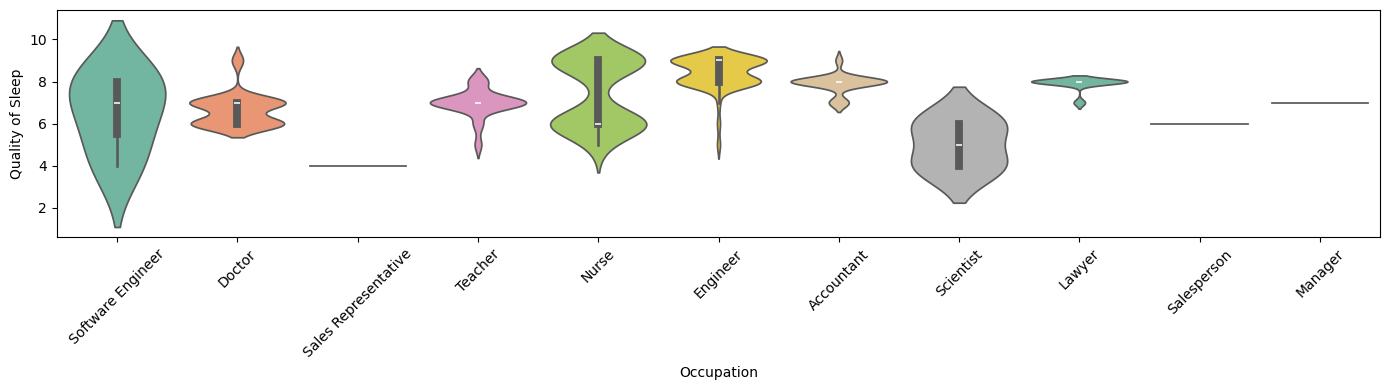

In [42]:
#Distribusi Kualitas tidur berdasarkan Occupation
plt.figure(figsize= (14,4))
sns.violinplot (x = 'Occupation', y='Quality of Sleep',data=ds,inner='box',palette='Set2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

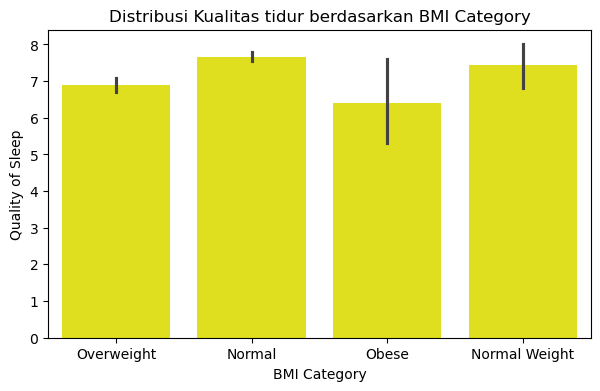

In [51]:
#Distribusi Kualitas tidur berdasarkan BMI Category
plt.figure(figsize = (7,4))
sns.barplot(x='BMI Category', y='Quality of Sleep', data=ds, color='yellow')
plt.title('Distribusi Kualitas tidur berdasarkan BMI Category')
plt.show()

<h2>Korelasi</h2>

In [55]:
#korelasi semua variabel data numerik
corr_qos = ds[numerik].corr()['Quality of Sleep'].sort_values(ascending= False)
print('Korelasi terhadar Kualitas Tidur')
print (corr_qos)

Korelasi terhadar Kualitas Tidur
Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Physical Activity Level    0.192896
Daily Steps                0.016791
Dystolic                  -0.110151
Systolic                  -0.121632
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


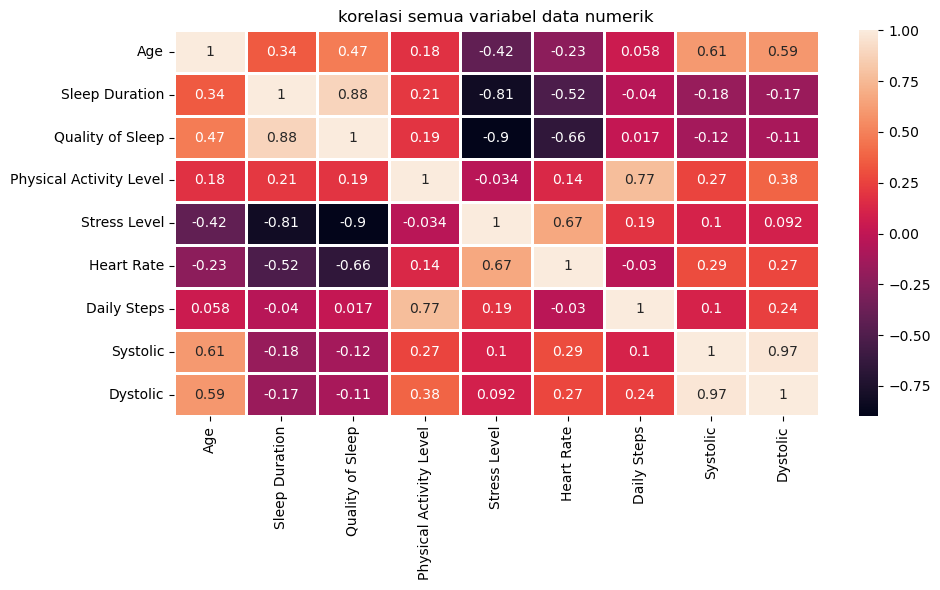

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(ds[numerik].corr(),annot=True, color = 'pink', linewidths=1)
plt.title ("korelasi semua variabel data numerik")
plt.tight_layout()
plt.show()

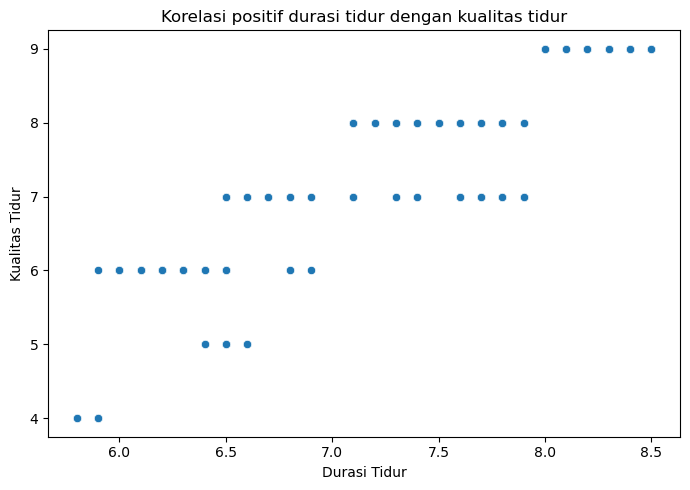

In [69]:
#Korelasi positif durasi tidur
plt.figure(figsize=(7,5))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep',data=ds)
plt.title('Korelasi positif durasi tidur dengan kualitas tidur')
plt.xlabel('Durasi Tidur')
plt.ylabel('Kualitas Tidur')
plt.tight_layout()
plt.show()

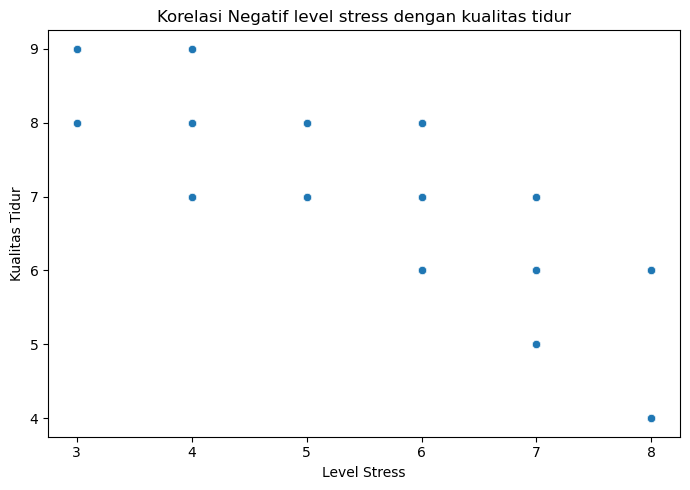

In [68]:
#Korelasi negatif stress level
plt.figure(figsize=(7,5))
sns.scatterplot(x='Stress Level', y='Quality of Sleep',data=ds)
plt.title('Korelasi Negatif level stress dengan kualitas tidur')
plt.xlabel('Level Stress')
plt.ylabel('Kualitas Tidur')
plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(ds['Daily Steps' ], ds['Quality of Sleep'])
print(f'Korelasi Pearson: {corr:.3f}, p-value: {p_value:.4f}')

Korelasi Pearson: 0.017, p-value: 0.7462


<h2>Regresi Linear</h2>

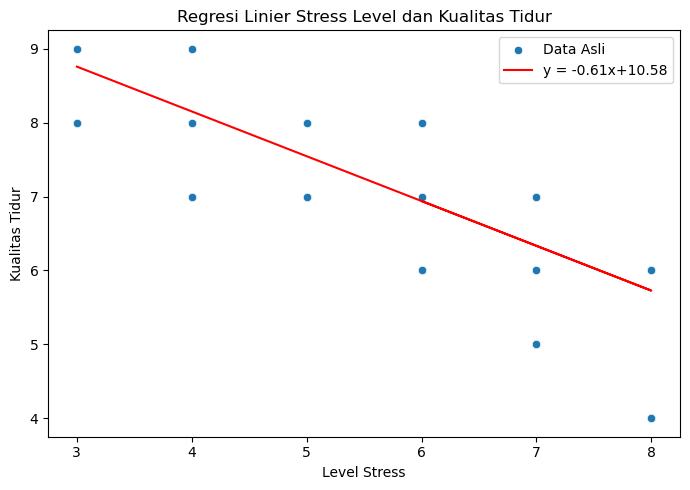

Persamaan garis regresi : y = -0.61x + 10.58
Nilai R2 : 0.8078


In [23]:
#Regresi Manual Stress Level dan QOS
x = ds['Stress Level']
y = ds['Quality of Sleep']

m = np.sum((x-x.mean())*(y-y.mean())) / np.sum((x-x.mean())**2)
b = y.mean()-m*x.mean()

y_pred = m* x + b

ss_res = np.sum((y-y_pred)**2)
ss_tot = np.sum((y-y.mean())**2)
r_squared = 1 - (ss_res/ss_tot)

plt.figure(figsize=(7,5))
sns.scatterplot(x=x,y=y,label = 'Data Asli')
plt.plot (x,y_pred,color = 'Red',label = f'y = {m:.2f}x+{b:.2f}')
plt.title('Regresi Linier Stress Level dan Kualitas Tidur')
plt.xlabel('Level Stress')
plt.ylabel('Kualitas Tidur')
plt.legend()
plt.tight_layout()
plt.show()

print (f"Persamaan garis regresi : y = {m:.2f}x + {b:.2f}")
print (f"Nilai R2 : {r_squared:.4f}")

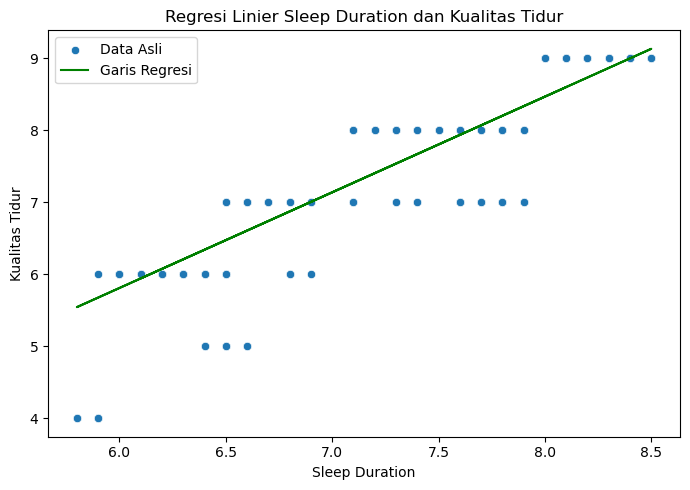

Nilai R2: 0.780


In [21]:
#regresi liburary antara Sleep duration dan QOS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = ds ['Sleep Duration'].values.reshape(-1,1)
y = ds ['Quality of Sleep']
model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)

plt.figure(figsize=(7,5))
sns.scatterplot(x=ds['Sleep Duration'],y= ds['Quality of Sleep'],label = 'Data Asli')
plt.plot (ds['Sleep Duration'],y_pred, color = 'Green',label = 'Garis Regresi')
plt.title('Regresi Linier Sleep Duration dan Kualitas Tidur')
plt.xlabel('Sleep Duration')
plt.ylabel('Kualitas Tidur')
plt.legend()
plt.tight_layout()
plt.show()

print (f"Nilai R2: {r2:.3f}")

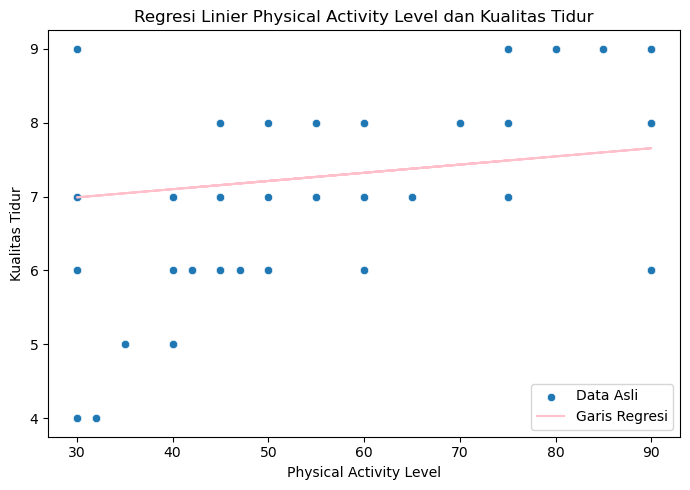

Nilai R2: 0.037


In [20]:
#Regresi QOs dan aktivitas fisik
x = ds ['Physical Activity Level'].values.reshape(-1,1)
y = ds ['Quality of Sleep']
model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)

plt.figure(figsize=(7,5))
sns.scatterplot(x=ds ['Physical Activity Level'],y= ds['Quality of Sleep'],label = 'Data Asli')
plt.plot (ds ['Physical Activity Level'],y_pred, color = 'Pink',label = 'Garis Regresi')
plt.title('Regresi Linier Physical Activity Level dan Kualitas Tidur')
plt.xlabel('Physical Activity Level')
plt.ylabel('Kualitas Tidur')
plt.legend()
plt.tight_layout()
plt.show()

print (f"Nilai R2: {r2:.3f}")

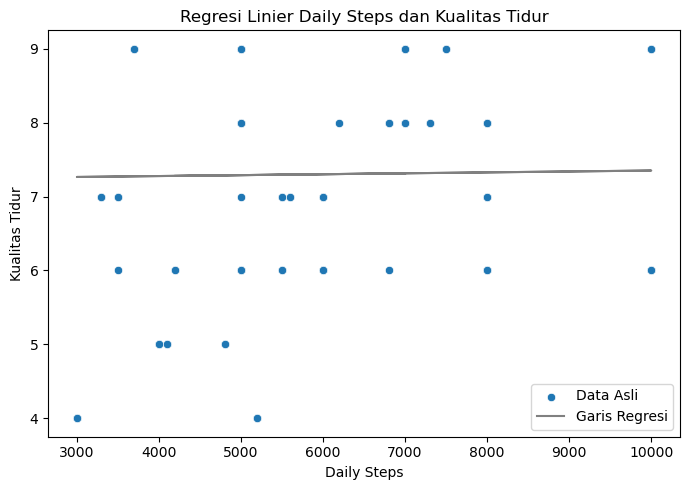

Nilai R2: 0.000


In [22]:
#Regresi QOs dan Daily Steps
x = ds ['Daily Steps'].values.reshape(-1,1)
y = ds ['Quality of Sleep']
model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)

plt.figure(figsize=(7,5))
sns.scatterplot(x=ds ['Daily Steps'],y= ds['Quality of Sleep'],label = 'Data Asli')
plt.plot (ds ['Daily Steps'],y_pred, color = 'Grey',label = 'Garis Regresi')
plt.title('Regresi Linier Daily Steps dan Kualitas Tidur')
plt.xlabel('Daily Steps')
plt.ylabel('Kualitas Tidur')
plt.legend()
plt.tight_layout()
plt.show()

print (f"Nilai R2: {r2:.3f}")

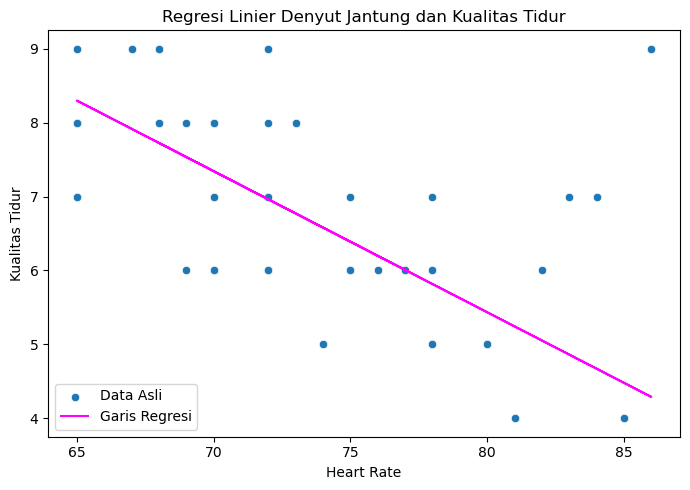

Nilai R2: 0.435


In [17]:
#Regresi QOs dan Heart Rate
x = ds ['Heart Rate'].values.reshape(-1,1)
y = ds ['Quality of Sleep']
model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)

plt.figure(figsize=(7,5))
sns.scatterplot(x=ds ['Heart Rate'],y= ds['Quality of Sleep'],label = 'Data Asli')
plt.plot (ds ['Heart Rate'],y_pred, color = 'Magenta',label = 'Garis Regresi')
plt.title('Regresi Linier Denyut Jantung dan Kualitas Tidur')
plt.xlabel('Heart Rate')
plt.ylabel('Kualitas Tidur')
plt.legend()
plt.tight_layout()
plt.show()

print (f"Nilai R2: {r2:.3f}")

<h2>Tambahan</h2>

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_22188\1517102554.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


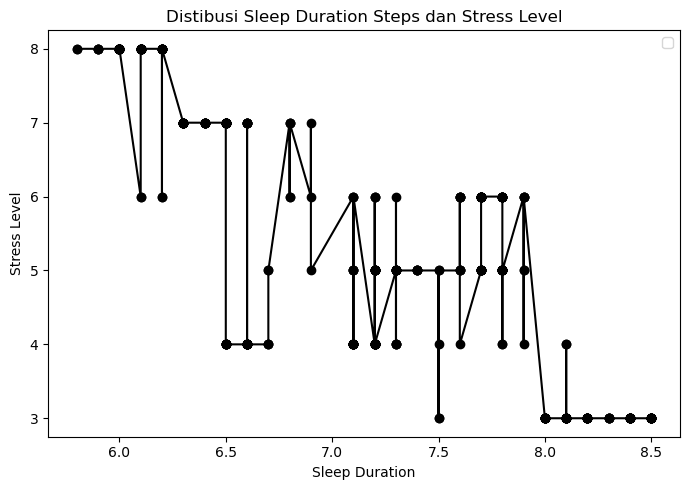

In [86]:
# distribusi durasi tidur dan level stress
ds_dur = ds.sort_values(by='Sleep Duration')
plt.figure(figsize=(7,5))
plt.plot (ds_dur['Sleep Duration'],ds_dur['Stress Level'], marker='o',linestyle='-', color = 'Black')
plt.title('Distibusi Sleep Duration Steps dan Stress Level')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.legend()
plt.tight_layout()
plt.show()